In [367]:
import numpy as np
import pandas as pd
import matplotlib as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

%matplotlib inline

In [368]:
####Exercise 3.1

#Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome 
#(like domestic total gross). How can you interpret the results of this model? What does it predict? 
#Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [369]:
df = pd.read_csv("2013_movies.csv")
df = df[np.isfinite(df['Budget'])]
df.head(30)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00
10,Star Trek Into Darkness,190000000.0,228778661,J.J. Abrams,PG-13,123,5/16/13 0:00
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,11/8/13 0:00


In [370]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['ReleaseMonth'] = df['ReleaseDate'].map(lambda x: x.month)

In [371]:
y = df.DomesticTotalGross #iloc[:, 2:3]
ones_array = np.ones([len(y),1])
X = ones_array
#one = np.ones([3,1])

In [372]:
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 21 Oct 2016   Prob (F-statistic):                nan
Time:                        10:01:03   Log-Likelihood:                -1753.0
No. Observations:                  89   AIC:                             3508.
Df Residuals:                      88   BIC:                             3511.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        1.03e+08   9.24e+06     11.148      0.000      8.47e+07  1.21e+08
==============================================================================
Omnibus:                       49.405   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.458
Skew:                           2.051   Prob(JB):                     2.10e-28
Kurtosis:                       7.189   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
# 
#
#

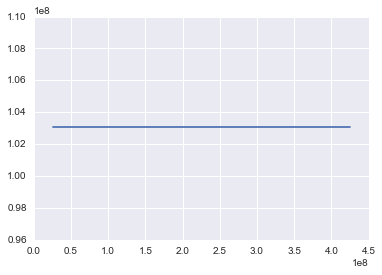

In [373]:
y_predict = fit.predict(X)
plt.plot(y, y_predict)
# No predictive insight from this plot since R^2 is zero. 

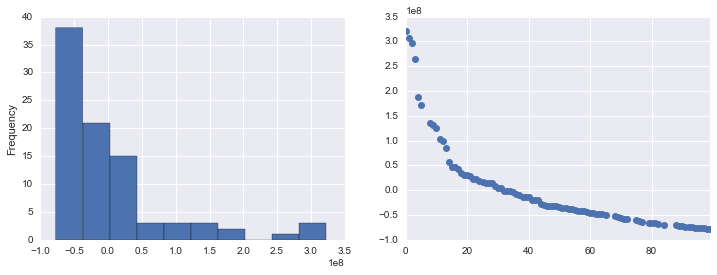

In [374]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
fit.resid.plot.hist()

plt.subplot(1,2,2)
fit.resid.plot(style='o')

In [375]:
# While the distribution of residuals is normally distributed, the model leaves a biased and heterostochastic spread
# for the error. 

In [376]:
#3.2 Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. 
#Also add plots of model prediction against your feature variable and residuals against feature variable. 
#How can you interpret what's happening in the model?

In [377]:
df['Ones'] = 1
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseMonth,Ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,5,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,7,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,6,1


In [378]:
y1, X1 = patsy.dmatrices('DomesticTotalGross ~ Budget + Ones', data=df, return_type="dataframe")

model = sm.OLS(y1, X1)

fit1 = model.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Fri, 21 Oct 2016   Prob (F-statistic):           6.80e-08
Time:                        10:01:28   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    2.22e+07   6.33e+06      3.504      0.001      9.61e+06  3.48e+07
Budget         0.7846      0.133      5.901      0.000         0.520     1.049
Ones         2.22e+07   6.33e+06      3.504      0.001      9.61e+06  3.48e+07
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     8.19e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

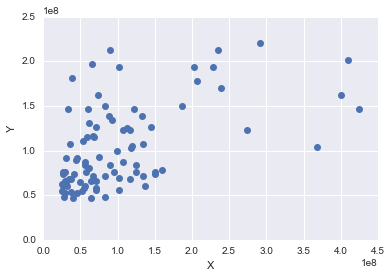

In [379]:
y_pred = fit1.predict(X1)
plt.plot(y1, y_pred, 'o')
plt.xlabel('X')
plt.ylabel('Y')
#With a R sqrd of ~.28, there appears to be a slight positive correlation that may be accounted for as a log or polynomial

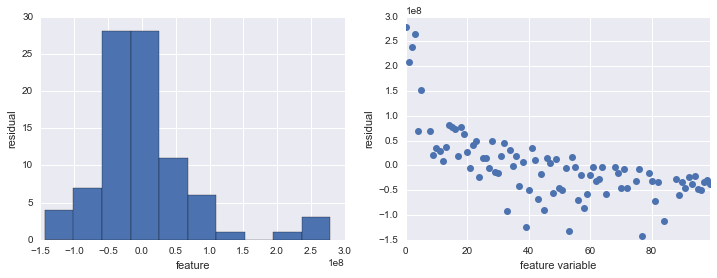

In [380]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
fit1.resid.plot.hist()
plt.xlabel('feature')
plt.ylabel('residual')

plt.subplot(1,2,2)
fit1.resid.plot(style='o')
plt.xlabel('feature variable')
plt.ylabel('residual')

In [381]:
#Approaching normally distributed, roughly what would be expected to be drawn from the random noise remaining. 
#However, in a scatter the error is biased and heterostochastic. A predictive relationship is unaccounted for in the present model.
#No large change from previous plot.

In [382]:
#3.3 Repeat the process of challenge 1, but add a categorical feature (like genre). 
#You'll have to convert a column of text into a number of numerical columns ("dummy variables"). 
#How can you interpret what's happening in the model?

In [383]:
dummies = pd.get_dummies(df['Rating'], )
df_new = pd.concat([df, dummies], axis=1)
df_new['PGthirteen'] = df_new['PG-13']
df_new.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseMonth,Ones,PG,PG-13,R,PGthirteen
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11,1,0.0,1.0,0.0,1.0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,5,1,0.0,1.0,0.0,1.0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11,1,1.0,0.0,0.0,0.0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,7,1,1.0,0.0,0.0,0.0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,6,1,0.0,1.0,0.0,1.0


In [384]:
#df_new.drop(df_new.columns[[9]], axis=1)
#df_new.head()

In [385]:
y2, X2 = patsy.dmatrices('DomesticTotalGross ~ Budget + Ones + PG + PGthirteen + R', data=df_new, return_type="dataframe")

model = sm.OLS(y2, X2)

fit1 = model.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     11.61
Date:                Fri, 21 Oct 2016   Prob (F-statistic):           1.87e-06
Time:                        10:01:41   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3483.
Df Residuals:                      85   BIC:                             3493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.029e+07   6.21e+06      3.270      0.002      7.95e+06  3.26e+07
Budget         0.7816      0.152      5.157      0.000         0.480     1.083
Ones        2.029e+07   6.21e+06      3.270      0.002      7.95e+06  3.26e+07
PG          1.714e+07   1.53e+07      1.122      0.265     -1.32e+07  4.75e+07
PGthirteen -1.257e+05   1.17e+07     -0.011      0.991     -2.33e+07   2.3e+07
R           3.275e+06    1.2e+07      0.273      0.786     -2.06e+07  2.71e+07
==============================================================================
Omnibus:                       37.951   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.664
Skew:                           1.546   Prob(JB):                     5.58e-20
Kurtosis:                       6.788   Cond. No.                     1.28e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.94e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [386]:
# 3.4
#Enhance your model further by adding more features and/or transforming existing features. 
#Think about how you build the model matrix and how to interpret what the model is doing.

In [387]:
import dateutil.parser

df_new['month'] = pd.to_datetime(df_new['ReleaseDate'])
df_new['month'] = df_new['month'].map(lambda x: x.month)

df_new.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseMonth,Ones,PG,PG-13,R,PGthirteen,month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11,1,0.0,1.0,0.0,1.0,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,5,1,0.0,1.0,0.0,1.0,5
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11,1,1.0,0.0,0.0,0.0,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,7,1,1.0,0.0,0.0,0.0,7
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,6,1,0.0,1.0,0.0,1.0,6


In [388]:
y3, X3 = patsy.dmatrices('DomesticTotalGross ~ Budget + Runtime + PG + PGthirteen + R + month*month + month', data=df_new, return_type="dataframe")

model = sm.OLS(y3, X3)

fit1 = model.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     7.218
Date:                Fri, 21 Oct 2016   Prob (F-statistic):           1.18e-05
Time:                        10:01:44   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3486.
Df Residuals:                      83   BIC:                             3501.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.068e+07   4.08e+07     -0.262      0.794     -9.18e+07  7.05e+07
Budget         0.7160      0.170      4.208      0.000         0.378     1.055
Runtime     5.499e+05   5.51e+05      0.998      0.321     -5.46e+05  1.65e+06
PG          1.307e+07   1.79e+07      0.729      0.468     -2.26e+07  4.87e+07
PGthirteen -1.322e+07   1.99e+07     -0.664      0.509     -5.29e+07  2.64e+07
R          -1.052e+07   2.05e+07     -0.514      0.608     -5.12e+07  3.02e+07
month       8.671e+05   2.54e+06      0.342      0.733     -4.18e+06  5.91e+06
==============================================================================
Omnibus:                       35.764   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.218
Skew:                           1.485   Prob(JB):                     1.04e-17
Kurtosis:                       6.503   Cond. No.                     1.39e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.15e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

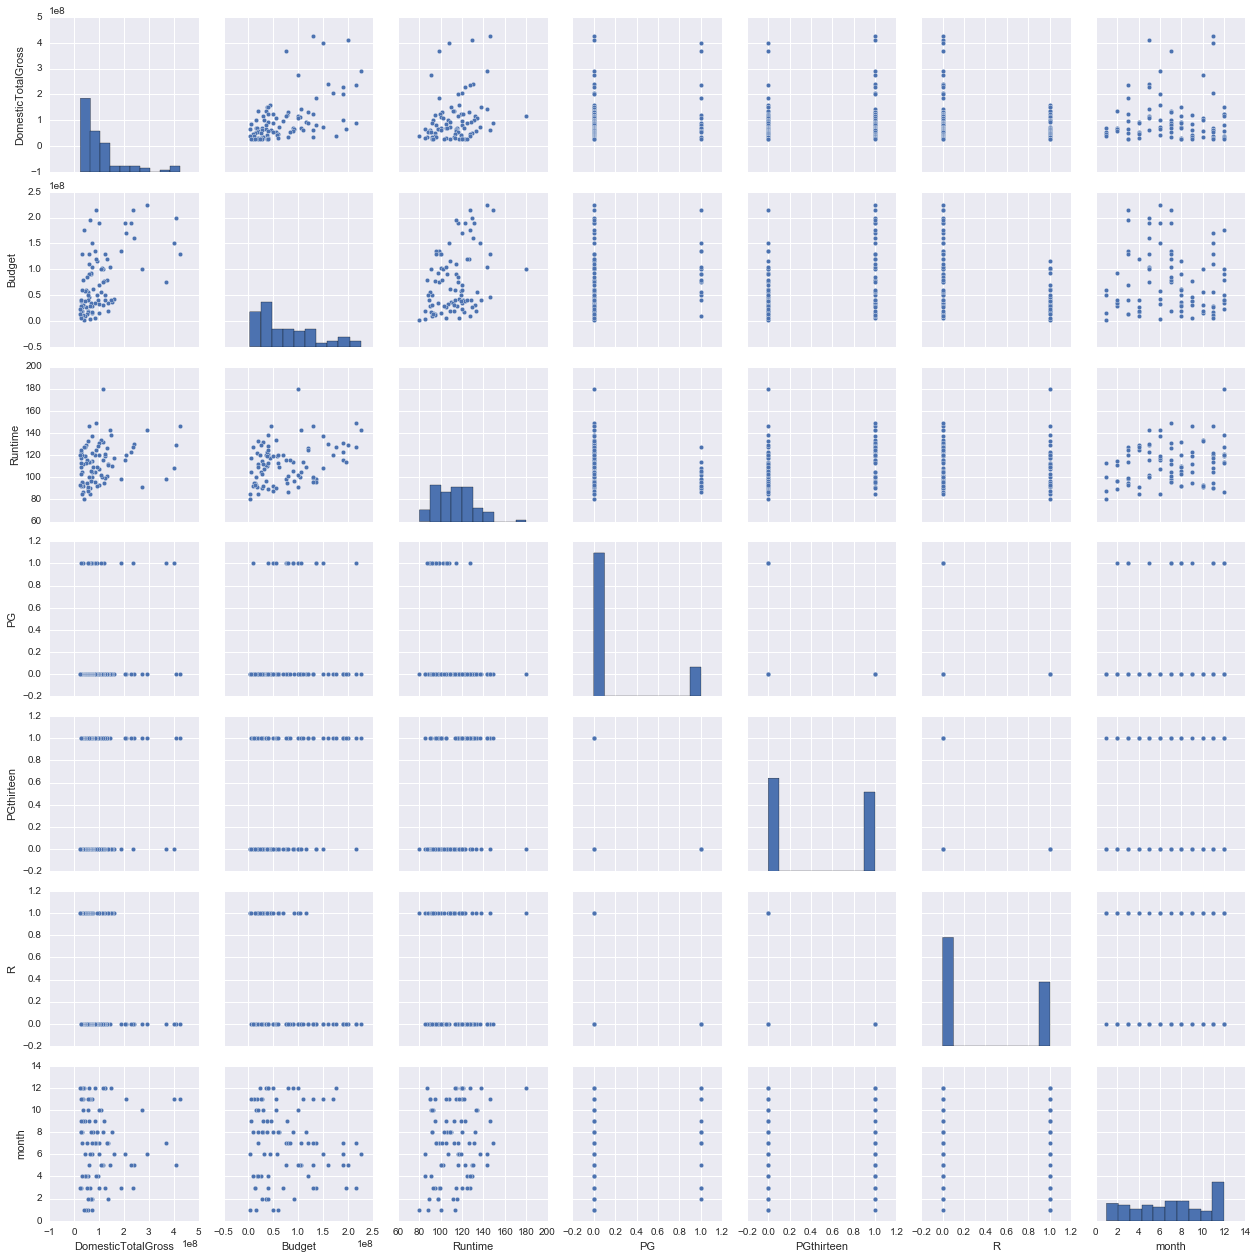

In [389]:
sns.pairplot(df_new[['DomesticTotalGross', 'Budget', 'Runtime', 'PG', 'PGthirteen', 'R', 'month']])

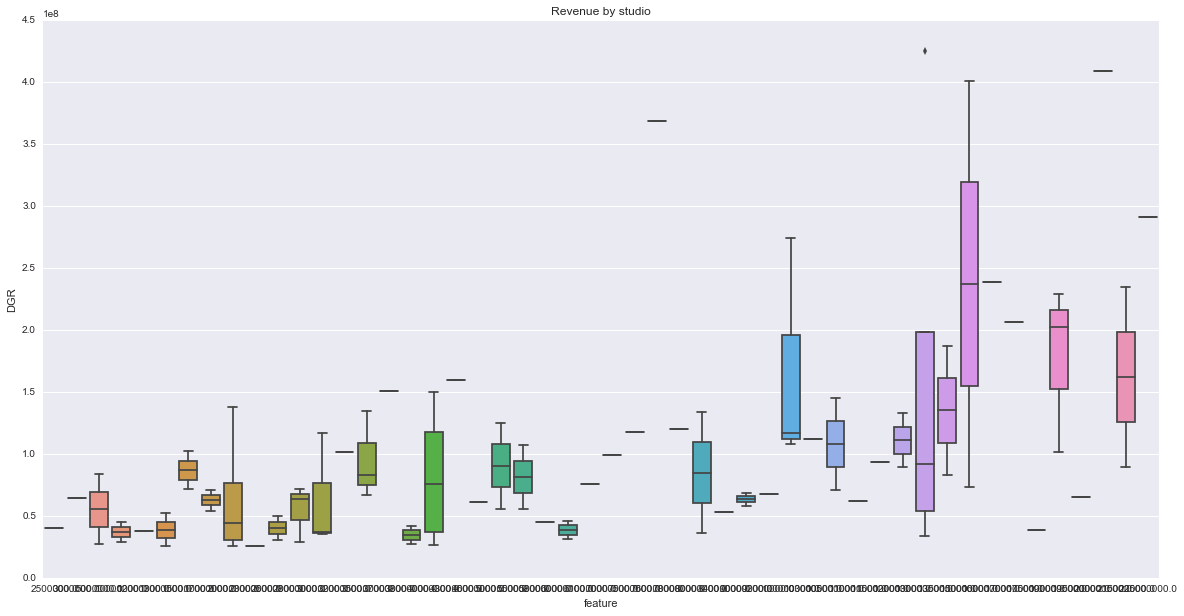

In [390]:
#sns.pairplot(df_new[['DomesticTotalGross', 'Budget', 'Runtime', 'PG', 'PGthirteen', 'R', 'month']])
#df_new.corr()
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Revenue by studio')
# set a seaborn box plot
sns.boxplot(x=df_new['Budget'].sort_values(), y=df_new['DomesticTotalGross'])
ax.set_xlabel('feature')
ax.set_ylabel('DGR')

In [391]:
# 3.5
#Fitting and checking predictions on the exact same data set can be misleading. 
#Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). 
#Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [392]:
# Dump your predictors into X
#features = test_df.columns.difference(["DGR"]) #difference excludes id'd 
#X = test_df.loc[:, features] #.drop creates a copy of a df, .loc encompasses change across defined rows and columns
# Dump your target variables (responses) into y
#y = test_df["DGR"] #response vector selected

y = df_new['DomesticTotalGross']
X = df_new.drop('DomesticTotalGross', 1).drop('Director',1).drop('Title',1).drop('Rating',1).drop('ReleaseDate',1).drop('Ones', 1)

X.head()

,Budget,Runtime,ReleaseMonth,PG,PG-13,R,PGthirteen,month
0,130000000.0,146,11,0.0,1.0,0.0,1.0,11
1,200000000.0,129,5,0.0,1.0,0.0,1.0,5
2,150000000.0,108,11,1.0,0.0,0.0,0.0,11
3,76000000.0,98,7,1.0,0.0,0.0,0.0,7
4,225000000.0,143,6,0.0,1.0,0.0,1.0,6


In [411]:
from sklearn import metrics
#lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.75)

#fit
#lr.fit(X_train, y_train)
#score
##y_predict = lr.score(X_test, y_test)

#y_pred = fit.predict(X_test)
model = sm.OLS(y_train, X_train) 
fit = model.fit()
y_predict = fit.predict(X_test)
score = metrics.r2_score(y_test, y_predict)

In [405]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)\nprint(X_train.shape)\nprint(X_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)\nknn = KNeighborsClassifier(n_neighbors=5)\nknn.fit(X_train, y_train)\ny_pred = knn.predict(X_test)\nprint(metrics.accuracy_score(y_test, y_pred))\n'

In [420]:
print(y_predict.shape)
print(y_test.shape)

(23,)
(23,)


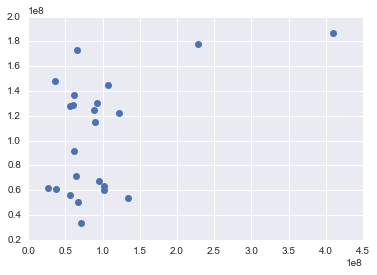

In [418]:
plt.plot(y_test ,y_predict, 'o')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
